## 原文件为梅雨 nc_hgt.py
### 本程序为将多个精度相同数据，入梅偏早年和入梅偏晚年hgt数据合并为一个数据（示例为200hPa偏晚年）
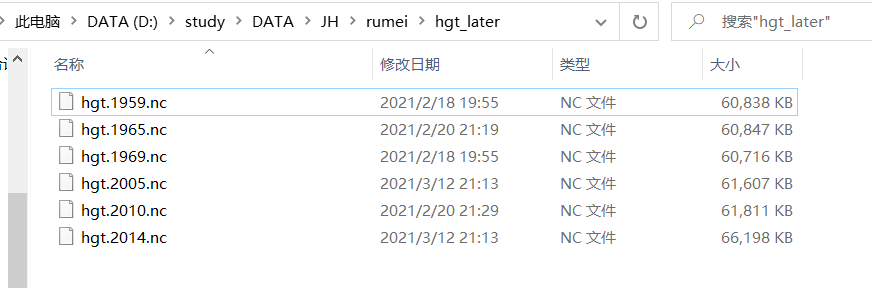

### tkinter对话框filedialog模块提供了各种用于生成文件对话框的工具函数
### os模块是对文件、文件夹执行操作的一个模块

In [1]:
import netCDF4 as nc
import cftime
from netCDF4 import Dataset 
import numpy as np

import tkinter as tk
from tkinter import filedialog 
import os

In [2]:
f=nc.Dataset(r'D:\study\DATA\JH\rumei\hgt_later\hgt.2014.nc',mode='r')
t=nc.num2date(f.variables['time'][:],'hours since 1800-01-01 00:00:0.0').data
level=(f.variables['level'][:])
lat=(f.variables['lat'][:])
lon=(f.variables['lon'][:])
time=(f.variables['time'][:])
hgt=(f.variables['hgt'][:])

In [3]:
f.close()

### 类：用于读取数据 __init__()是一个最基本的特殊方法（魔法方法）

In [4]:
class ncfile:
    def __init__(self,file_name):
        #用于读取数据
        NCfile=nc.Dataset(file_name)
        #获取维度的值，一般有时间、经纬度、各个数值
        self.time=NCfile.variables['time'][:].data
        self.hgt=NCfile.variables['hgt'][:].data
        self.level=NCfile.variables['level'][:].data

### 新生成文件的变量

In [5]:
year1=[1956,1961,1971,1984,1989,2020] #入梅偏早年
year2=[1959,1965,1969,2005,2010,2014] #入梅偏晚年
times=[]
levels=[]
hgt1s=[]
hgt2s=[]
hgt3s=[]

### 读取存放要合并文件的文件夹

In [6]:
def read_files():
    #读取存放要合并文件的文件夹
    
    Folderpath=filedialog.askdirectory(initialdir=r'D:\study\DATA\JH\rumei\hgt_later')
    filelist = os.listdir(Folderpath)
    
    global n
    n=len(filelist)
    
    for i in range(n):
        a=ncfile(str(Folderpath)+"/"+filelist[i]) #运行class ncfile
        levels.append(a.level[9])
        hgt1s.append(a.hgt[155,9,:,:])
        hgt2s.append(a.hgt[167,9,:,:])
        hgt3s.append(a.hgt[178,9,:,:])
        #用append会使多维数据增加一个维度

        
read_files()he

### 创建新文件

In [7]:
new_NC = nc.Dataset(r"D:\study\DATA\JH\rumei\hgt_later_200.nc", 'w', format='NETCDF4')

#定义维度，后一个参数表示维度的长度，因为是合并的同一个产品的数据，所以是统一
#的,注意维度的长度一定要和读入的数据匹配
new_NC.createDimension('year')
new_NC.createDimension('lat', 73)
new_NC.createDimension('lon', 144)
new_NC.createDimension('hgt1')
new_NC.createDimension('hgt2')
new_NC.createDimension('hgt3')


#定义变量，这里需要规定变量的类型，以及限制它的维度
#可以看到，四个与数据相关的变量，其由另外三个基本维度约束
var_year=new_NC.createVariable('year', 'f', ("year"))
var_lat=new_NC.createVariable('lat', 'f', ("lat"))
var_lon=new_NC.createVariable('lon', 'f', ("lon"))
var_hgt1=new_NC.createVariable('hgt1', 'f', ("year","lat","lon"))
var_hgt2=new_NC.createVariable('hgt2', 'f', ("year","lat","lon"))
var_hgt3=new_NC.createVariable('hgt3', 'f', ("year","lat","lon"))

#向变量中填充数据
new_NC.variables['year'][:] = year1
new_NC.variables['lat'][:] = lat
new_NC.variables['lon'][:] = lon
new_NC.variables['hgt1'][:]=hgt1s
new_NC.variables['hgt2'][:]=hgt2s
new_NC.variables['hgt3'][:]=hgt3s

#定义新NetCDF文件变量的属性信息，只是用于描述，没有实际意义                                      
var_lat.units="degree_north"
var_lat.actual_range="[90 -90]"
var_lat.long_name="Latitude"
var_lat.axis="Y"
var_lon.units="degree_east"
var_lon.actual_range="[0 357.5]"
var_lon.long_name="Lontitude"
var_lon.axis="X"
var_hgt1.long_name="mean Daily Geopotential height"
var_hgt1.units="m"
var_hgt1.missing_value="-9.96921e+36"
var_hgt1.level="200hPa"
var_hgt1.day="6-5"
var_hgt2.long_name="mean Daily Geopotential height"
var_hgt2.units="m"
var_hgt2.missing_value="-9.96921e+36"
var_hgt2.level="200hPa"
var_hgt2.day="6-17"
var_hgt3.long_name="mean Daily Geopotential height"
var_hgt3.units="m"
var_hgt3.missing_value="-9.96921e+36"
var_hgt3.level="200hPa"
var_hgt3.day="6-28"

#最后记得关闭文件
new_NC.close()

<ipython-input-7-a4264e6e68f2>:41: UserWarning: WARNING: missing_value cannot be safely cast to variable dtype
  var_hgt1.missing_value="-9.96921e+36"
<ipython-input-7-a4264e6e68f2>:46: UserWarning: WARNING: missing_value cannot be safely cast to variable dtype
  var_hgt2.missing_value="-9.96921e+36"
<ipython-input-7-a4264e6e68f2>:51: UserWarning: WARNING: missing_value cannot be safely cast to variable dtype
  var_hgt3.missing_value="-9.96921e+36"
